In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns
from matplotlib_venn import venn2, venn2_circles
import warnings
warnings.filterwarnings('ignore')

## Overlap of anti-ZNF143 and anti-FLAG replicated peaks

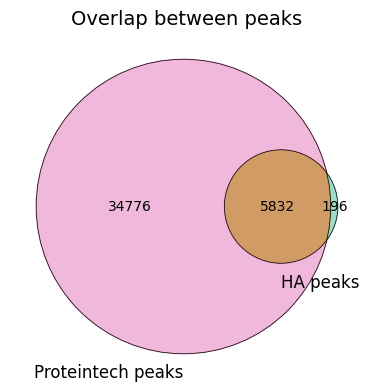

In [3]:
plt.figure(figsize = (4, 4))
plt.title('Overlap between peaks', fontsize = 14)
v = venn2([34776, 196, 5832], ('Proteintech peaks', 'HA peaks'), alpha = 0.6)
c = venn2_circles([34776, 196, 5832], lw = 0.5)
v.get_patch_by_id('10').set_color('#E78AC3')
v.get_patch_by_id('01').set_color('#66C2A5')

plt.tight_layout()
plt.show()

## Motifs enrichment

In [4]:
enrichments = pd.DataFrame()
common = pd.read_csv('./annotations/motifs_enrichment_peaks_common.txt')
enrichments['motifs'] = common['V1']
enrichments['common'] = common['V2']/common['V3']
znf143 = pd.read_csv('./annotations/motifs_enrichment_peaks_proteintech.txt')
enrichments['proteintech'] = znf143['V2']/znf143['V3']
flag = pd.read_csv('./annotations/motifs_enrichment_peaks_ha.txt')
enrichments['ha'] = flag['V2']/flag['V3']
enrichments

,motifs,common,proteintech,ha
0,ZFP143_SBS1_denovo_motifs,5.176957,1.831516,6.705539
1,ZFP143_SBS2_denovo_motifs,5.789427,1.412539,1.049144
2,CTCF_JASPAR_motifs,2.110950,5.983844,2.217195


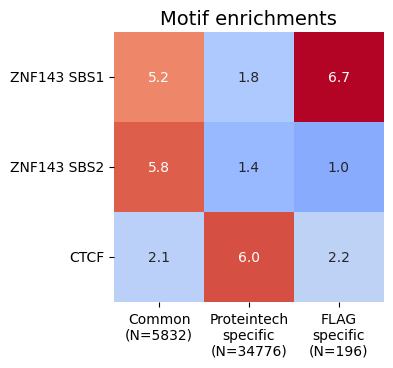

In [5]:
plt.figure(figsize = (3.5, 3.5))
plt.title('Motif enrichments', fontsize = 14)
sns.heatmap(enrichments.drop(['motifs'], axis = 1), annot = True, fmt = '.1f',
            cmap = 'coolwarm', cbar = 0, center = 3, square = True,
            xticklabels = ['Common\n(N=5832)', 'Proteintech\nspecific\n(N=34776)', 'FLAG\nspecific\n(N=196)'],
            yticklabels = ['ZNF143 SBS1', 'ZNF143 SBS2', 'CTCF'])
plt.yticks(rotation = 0)
plt.show()